# **ESG - Post Medium**

***
## Crescimento nas pesquisas sobre o termo "ESG"
* **Google trends**
	* baixar o csv com os dados de 01/01/2011-31/12/2020 com as pesquisas do termo "ESG" no Brasil e no Mundo.

***
## Visualização da composição das carteira
* **Web scraping da composição da carteiras no site da B3**
	* Ibovespa - [IBOV](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.html)
	* Indice de Sustentabilidade Empresarial - [ISE](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-sustentabilidade/indice-de-sustentabilidade-empresarial-ise.html)
	* Indice Carbono Eficiente - [ICO2](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-sustentabilidade/indice-carbono-eficiente-ico2.html)
* **Gráfico de visualização**

***
## Baixar dados de cotações diarias dos indices para visualizar o retorno ao longo do tempo
* **Investing (API) - [investpy](https://pypi.org/project/investpy/)**
* **plotar gráfico de linha para melhor visulização**

***

### Importations

In [1]:
import pandas as pd
pd.set_option('display.min_rows', 50)
pd.set_option('display.max_rows', 200)
import investpy as inv
import matplotlib.pyplot as plt

### Crescimento nas pesquisas sobre o termo "ESG"

In [2]:
# Carregando dados csv baixados do google trends
trends_world = pd.read_csv('esg_mundo_2011-2020.csv', sep=',', header=1)

In [3]:
trends_world.columns = ['Data', 'Pesquisa pelo termo ESG']
trends_world['Data'] = pd.to_datetime(trends_world['Data'])
trends_world['Pesquisa pelo termo ESG'] = trends_world[
    'Pesquisa pelo termo ESG'].astype(float)
trends_world.head()

,Data,Pesquisa pelo termo ESG
0,2011-01-01,31.0
1,2011-02-01,30.0
2,2011-03-01,33.0
3,2011-04-01,28.0
4,2011-05-01,34.0


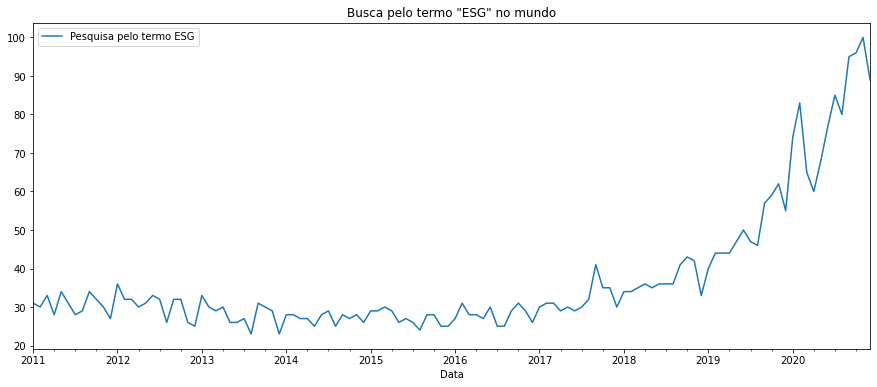

In [4]:
# Gerando gráfico
trends_world.plot('Data',
                  'Pesquisa pelo termo ESG',
                  figsize=(15, 6),
                  title='Busca pelo termo "ESG" no mundo')

plt.savefig('trends_world.png')
plt.show()

In [5]:
# Carregando dados csv baixados do google trends
trends_brasil = pd.read_csv('esg_brasil_2011-2020.csv', sep=',', header=1)

In [6]:
trends_brasil.columns = ['Data', 'Pesquisa pelo termo ESG']
trends_brasil['Data'] = pd.to_datetime(trends_brasil['Data'])
trends_brasil['Pesquisa pelo termo ESG'] = trends_brasil[
    'Pesquisa pelo termo ESG'].astype(float)
trends_brasil.head()

,Data,Pesquisa pelo termo ESG
0,2011-01-01,16.0
1,2011-02-01,16.0
2,2011-03-01,17.0
3,2011-04-01,27.0
4,2011-05-01,14.0


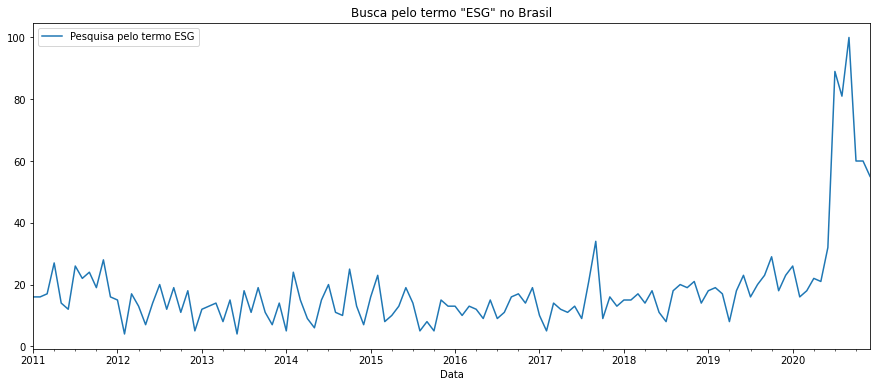

In [7]:
# Gerando gráfico
trends_brasil.plot('Data',
                   'Pesquisa pelo termo ESG',
                   figsize=(15, 6),
                   title='Busca pelo termo "ESG" no Brasil')

plt.savefig('trends_brasil.png')
plt.show()

### Visualização da composição das carteira

In [8]:
# Função para acessar os indices
def buscar_carteira_teorica(indice):
    url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&amp;idioma=pt-br'.format(indice.upper())
    return pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1]

In [9]:
# IBOVESPA
IBOV = buscar_carteira_teorica('IBOV')
IBOV.index.names = ['tickers']
IBOV.columns = ['Company', 'segment', 'theoretical_quantity', 'percentage_share']
IBOV.sort_values('percentage_share', ascending=False).head()

,Company,segment,theoretical_quantity,percentage_share
tickers,,,,
VALE3,VALE,ON NM,2837320141,12.246
ITUB4,ITAUUNIBANCO,PN EJ N1,4757466114,6.441
PETR4,PETROBRAS,PN N2,4566457037,5.731
B3SA3,B3,ON NM,1930877944,5.237
BBDC4,BRADESCO,PN N1,4261649634,4.938


In [10]:
# INDICE DE SUSTENTABILIDADE EMPRESARIAL
ISE = buscar_carteira_teorica('ISE')
ISE.index.names = ['tickers']
ISE.columns = ['Company', 'segment', 'theoretical_quantity', 'percentage_share']
ISE.sort_values('percentage_share', ascending=False).head()

,Company,segment,theoretical_quantity,percentage_share
tickers,,,,
WEGE3,WEG,ON NM,741148001,10.533
SUZB3,SUZANO S.A.,ON NM,724921241,7.453
PETR4,PETROBRAS,PN N2,1618637938,7.004
NTCO3,GRUPO NATURA,ON NM,841083922,6.628
PETR3,PETROBRAS,ON N2,1305861310,5.784


In [11]:
# INDICE DE CARBONO EFICIENTE
ICO2 = buscar_carteira_teorica('ICO2')
ICO2.index.names = ['tickers']
ICO2.columns = ['Company', 'segment', 'theoretical_quantity', 'percentage_share']
ICO2.sort_values('percentage_share', ascending=False).head()

,Company,segment,theoretical_quantity,percentage_share
tickers,,,,
ITUB4,ITAUUNIBANCO,PN EJ N1,5098496029,9.297
B3SA3,B3,ON NM,2221522263,8.116
BBDC4,BRADESCO,PN N1,4657874445,7.269
MGLU3,MAGAZ LUIZA,ON NM,3092801111,5.015
WEGE3,WEG,ON NM,864152480,4.797


### Baixar dados de cotações diarias dos indices para visualizar o retorno ao longo do tempo

In [12]:
# Lista de Indices
indices_list = inv.get_indices_list('Brazil')
indices_list

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

In [13]:
indices_overview = inv.get_indices_overview('Brazil')
indices_overview

,country,name,last,high,low,change,change_percentage,currency
0,brazil,Bovespa,117380.49,118317.52,116108.90,0.00,0.00%,BRL
1,brazil,Brazil 50,19486.75,19624.93,19242.97,0.00,0.00%,BRL
2,brazil,Tag Along,26231.32,26427.27,25932.18,0.00,0.00%,BRL
3,brazil,Brazil broad-Based,4675.76,4712.11,4623.54,0.00,0.00%,BRL
4,brazil,Brazil Index,49984.59,50366.86,49420.69,0.00,0.00%,BRL
5,brazil,Mid-Large Cap Index,2273.17,2288.59,2245.81,0.00,0.00%,BRL
6,brazil,Small Cap Index,2729.40,2768.19,2706.34,0.00,0.00%,BRL
7,brazil,Basic Materials,5791.50,5820.67,5696.84,0.00,0.00%,BRL
8,brazil,Electrical Energy,79325.78,79589.46,78411.69,0.00,0.00%,BRL
9,brazil,Industrial Sector,23897.44,24000.49,23613.14,0.00,0.00%,BRL


In [14]:
close_index = ['Bovespa', 'Corporate Sustainability', 'Carbon Efficient']

mydata = pd.DataFrame()
for c in close_index:
    mydata[c] = inv.get_index_historical_data(c, country='brazil', from_date='01/01/2011', to_date='31/12/2020')["Close"]

mydata.head()

,Bovespa,Corporate Sustainability,Carbon Efficient
Date,,,
2011-01-03,69962.32,2119.01,1121.29
2011-01-04,70317.79,2140.21,1127.49
2011-01-05,71091.03,2165.54,1138.77
2011-01-06,70578.83,2148.27,1126.40
2011-01-07,70057.20,2137.57,1113.95


In [15]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2503 entries, 2011-01-03 to 2020-12-30
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bovespa                   2503 non-null   float64
 1   Corporate Sustainability  2503 non-null   float64
 2   Carbon Efficient          2503 non-null   float64
dtypes: float64(3)
memory usage: 78.2 KB


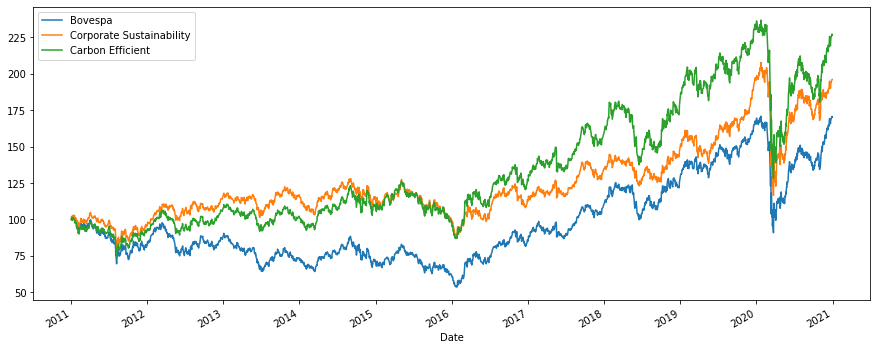

In [16]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.savefig('index_return-2011_2020.png')
plt.show()